In [1]:
import sys
import pandas as pd
from time import time
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.random_projection import johnson_lindenstrauss_min_dim
from sklearn.random_projection import SparseRandomProjection
from sklearn.random_projection import GaussianRandomProjection
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.utils.fixes import parse_version
from sklearn.preprocessing import MinMaxScaler
from pca import pca

In [2]:
data = 'data/heart_1.csv'
df = pd.read_csv(data)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


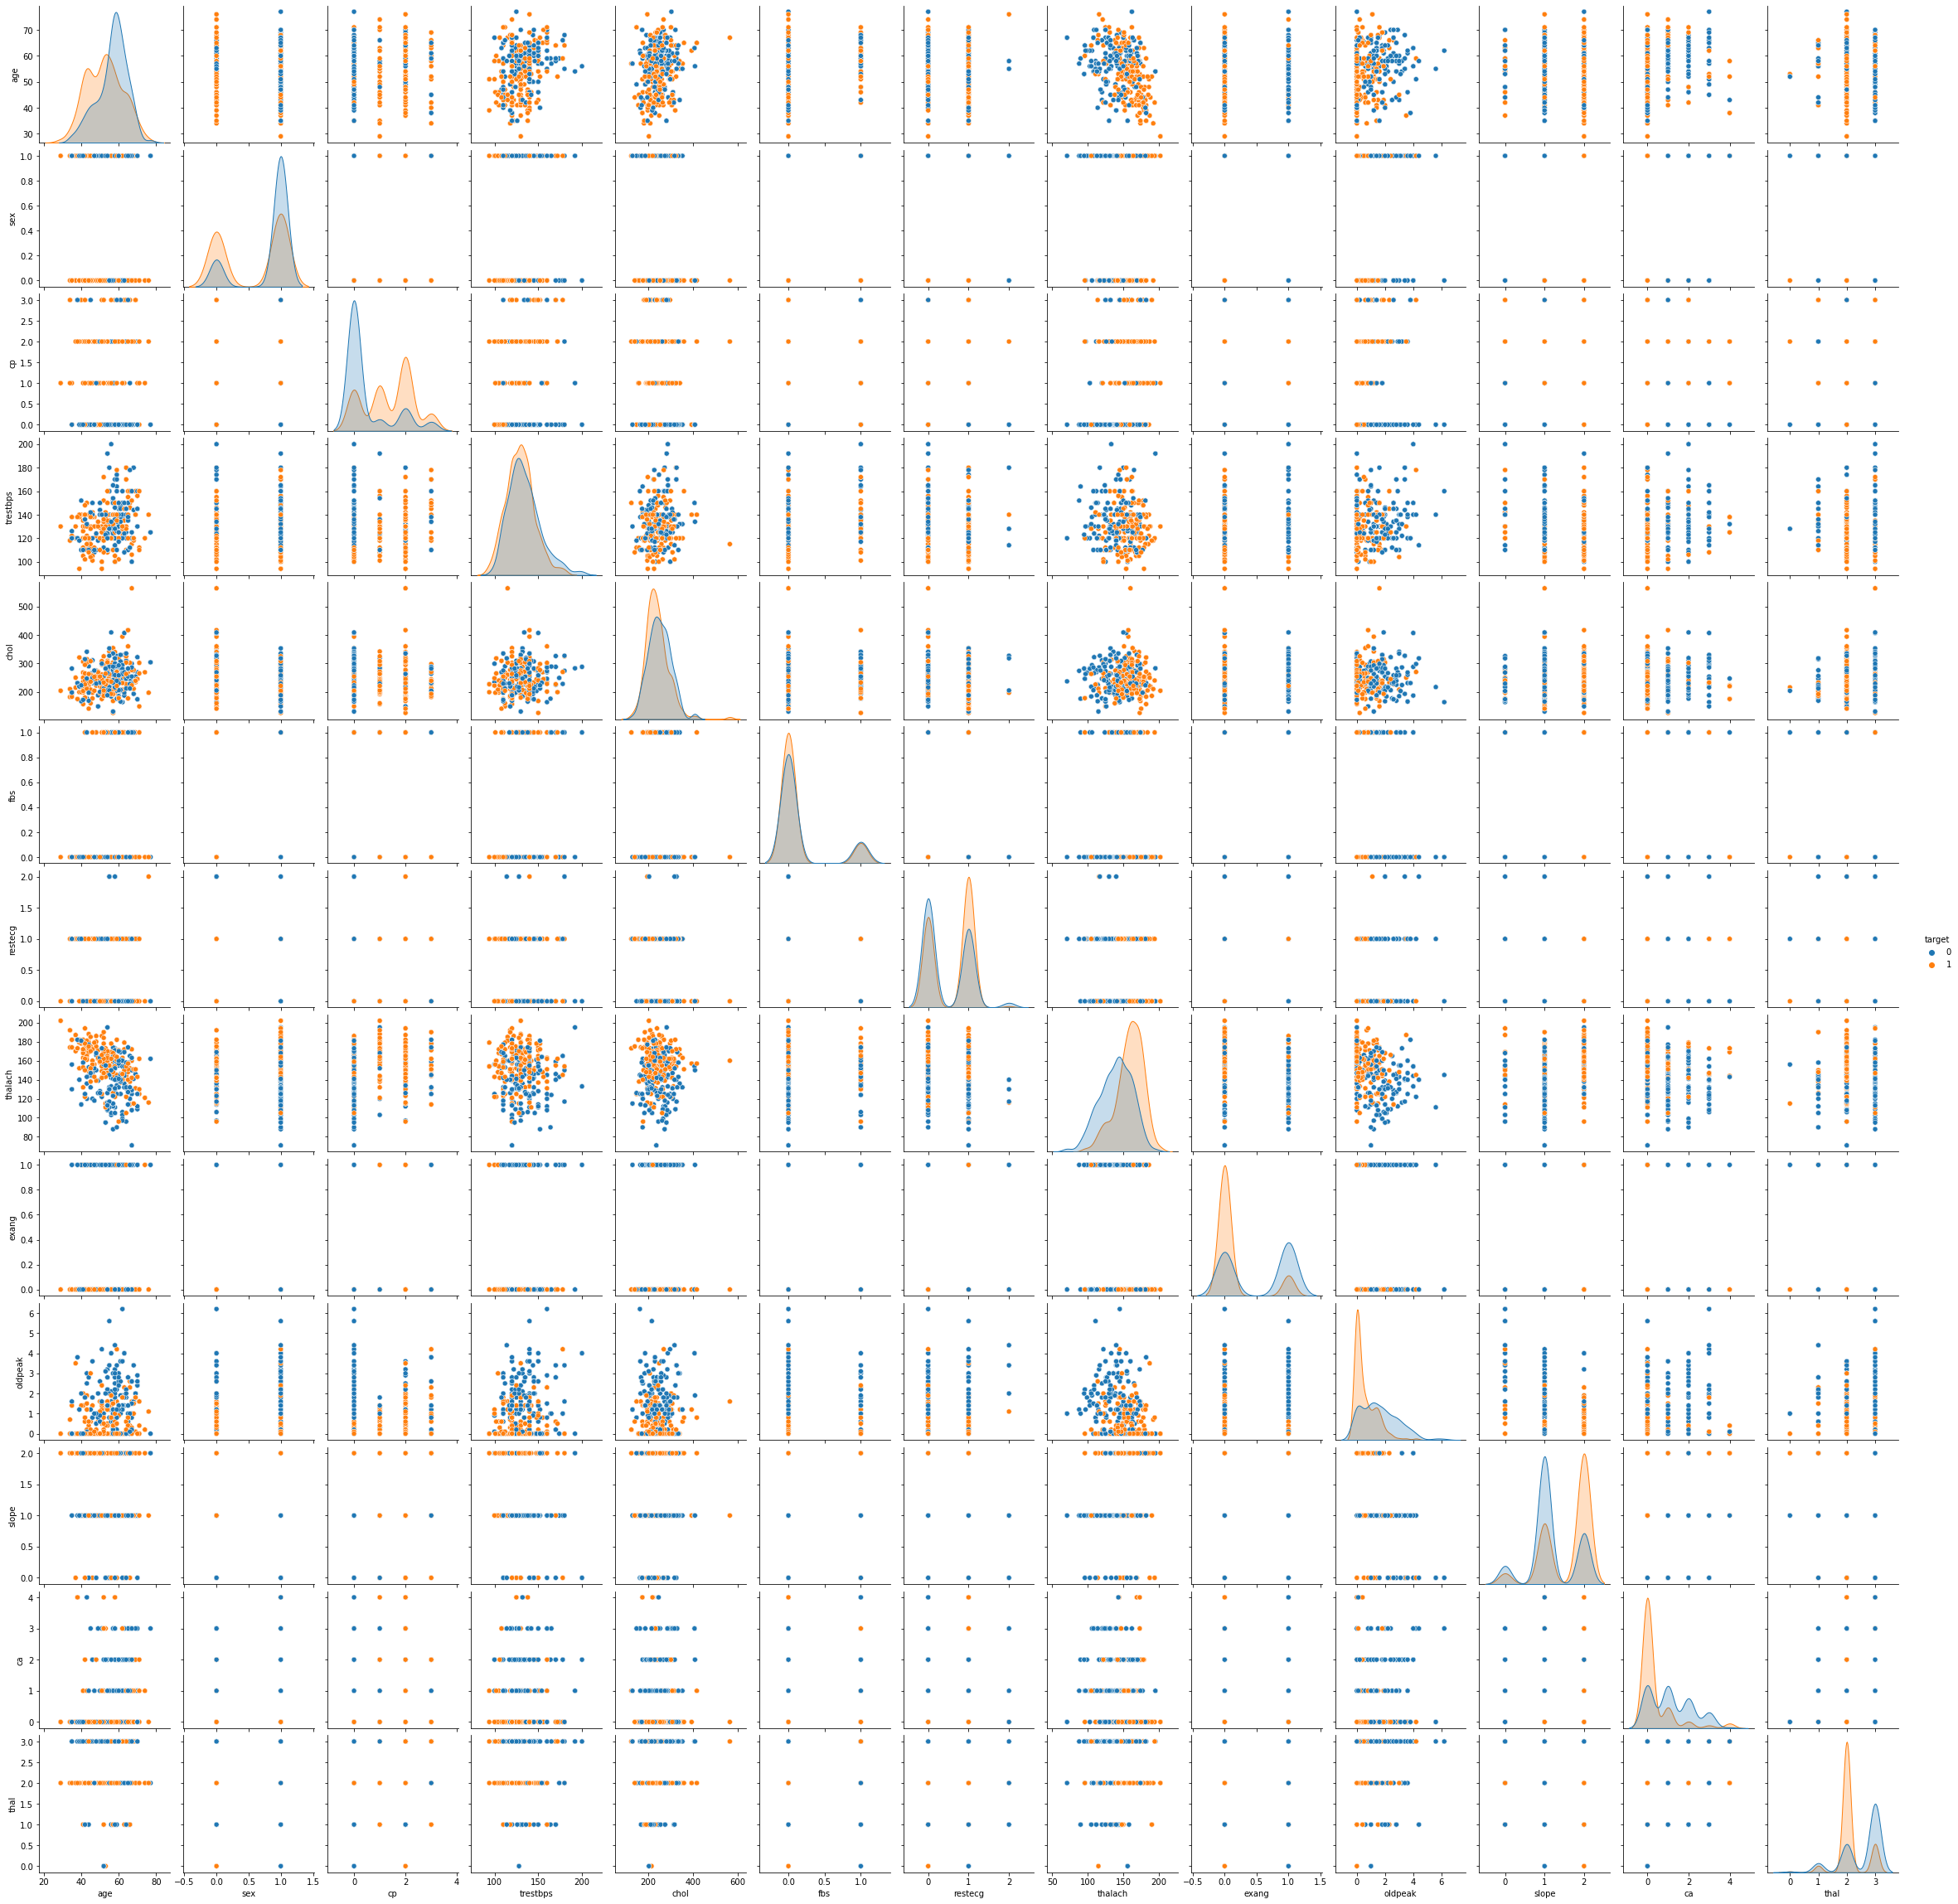

In [81]:
sns.pairplot(df, hue = 'target')
plt.show()

In [3]:
df=df.drop(['target'], axis = 1)

In [4]:
scaler = MinMaxScaler()
df[['age', 'sex', 'cp', 'trestbps', 'chol','fbs', 'restecg','thalach', 'exang', 'oldpeak', 'slope','ca','thal']] = scaler.fit_transform(df[['age', 'sex', 'cp', 'trestbps', 'chol','fbs', 'restecg','thalach', 'exang', 'oldpeak', 'slope','ca','thal']])

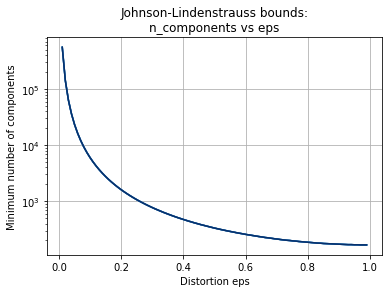

In [5]:
# range of admissible distortions
eps_range = np.linspace(0.01, 0.99, 100)

# range of number of samples (observation) to embed
n_samples_range = np.logspace(2, 6, 5)
colors = plt.cm.Blues(np.linspace(0.3, 1.0, len(n_samples_range)))

plt.figure()
for n_samples, color in zip(n_samples_range, colors):
    min_n_components = johnson_lindenstrauss_min_dim(1025, eps=eps_range)
    plt.semilogy(eps_range, min_n_components, color=color)

#plt.legend(["n_samples = %d" % n for n in n_samples_range], loc="upper right")
plt.xlabel("Distortion eps")
plt.ylabel("Minimum number of components")
plt.title("Johnson-Lindenstrauss bounds:\nn_components vs eps")
plt.grid()
plt.show()

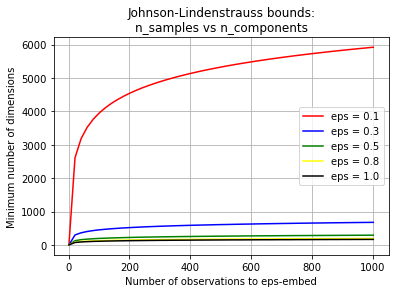

In [11]:
# range of admissible distortions
eps_range = np.linspace(0.1, 0.99, 5)
#colors = plt.cm.Blues(np.linspace(0.3, 1.0, len(eps_range)))
colors = ['red', 'blue', 'green', 'yellow', 'black']

# range of number of samples (observation) to embed
n_samples_range = range(1, 1020, 20)

plt.figure()
for eps, color in zip(eps_range, colors):
    min_n_components = johnson_lindenstrauss_min_dim(n_samples_range, eps=eps)
    plt.plot(n_samples_range, min_n_components, color=color)

plt.legend(["eps = %0.1f" % eps for eps in eps_range], loc="best")
plt.xlabel("Number of observations to eps-embed")
plt.ylabel("Minimum number of dimensions")
plt.title("Johnson-Lindenstrauss bounds:\nn_samples vs n_components")
plt.grid()
plt.show()

In [9]:
RCA = GaussianRandomProjection(n_components= 9, eps=0.3, random_state=None).fit(df)

In [8]:
RCA.n_components_

10

In [9]:
data = RCA.transform(df)

In [10]:
X = pd.DataFrame()

In [11]:
X['RCA1'], X['RCA2'], X['RCA3'], X['RCA4'], X['RCA5'],X['RCA6'], X['RCA7'], X['RCA8'], X['RCA9'], X['RCA10'] = data.T

In [12]:
X

,RCA1,RCA2,RCA3,RCA4,RCA5,RCA6,RCA7,RCA8,RCA9,RCA10
0,0.712411,-1.187167,-0.189748,-0.072800,-2.010786,0.324473,0.334355,0.127410,-0.734547,-1.058416
1,0.236124,-0.495868,-0.698231,0.272746,-0.675750,0.525962,-0.038743,-0.818777,-1.117958,-0.063447
2,0.441481,-0.690733,-0.257584,-0.152245,-0.652783,0.266473,0.439022,-0.898745,-1.182911,-0.379602
3,0.736023,-0.964978,0.050350,-0.092591,-1.869745,0.376301,0.539024,0.120112,-0.744211,-1.113845
4,0.430171,-0.177705,0.233712,-0.402465,-0.934314,-0.373212,-0.378670,-0.526784,-0.164599,0.252195
...,...,...,...,...,...,...,...,...,...,...
1020,0.101493,-1.090398,-0.273666,-0.201572,-1.512495,0.379951,0.529519,-0.314561,-1.171423,-0.788363
1021,0.097703,-1.201907,-0.558905,-0.146379,-1.216257,0.644224,0.379344,-0.663567,-1.409282,-0.558012
1022,-0.138039,-0.994898,-0.540083,-0.171292,-1.116683,0.478733,0.277201,-0.496370,-1.228117,-0.334408
1023,0.195363,-1.043532,0.150551,-0.264470,-1.264513,0.534935,0.589397,0.170686,-0.524435,-0.800017


C:\Users\707609\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


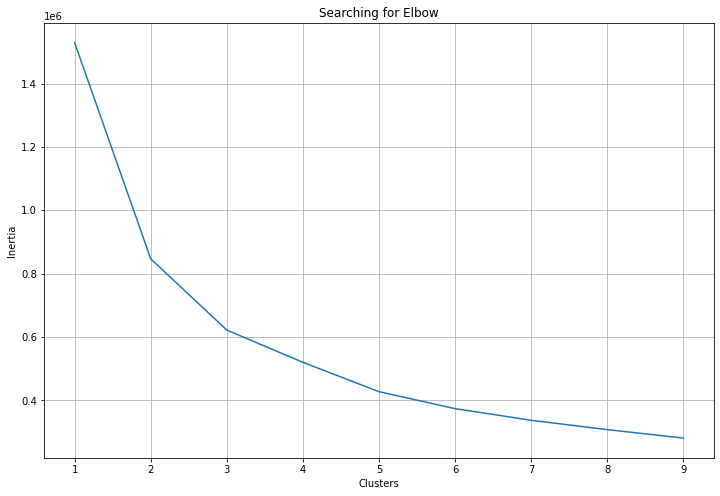

In [46]:
from sklearn.cluster import KMeans

clusters = []

for i in range(1, 10):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 10)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

# Annotate arrow


plt.grid()
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.4045195917578842
For n_clusters = 3 The average silhouette_score is : 0.31896353264867483
For n_clusters = 4 The average silhouette_score is : 0.3178655704045688
For n_clusters = 5 The average silhouette_score is : 0.305023377841352


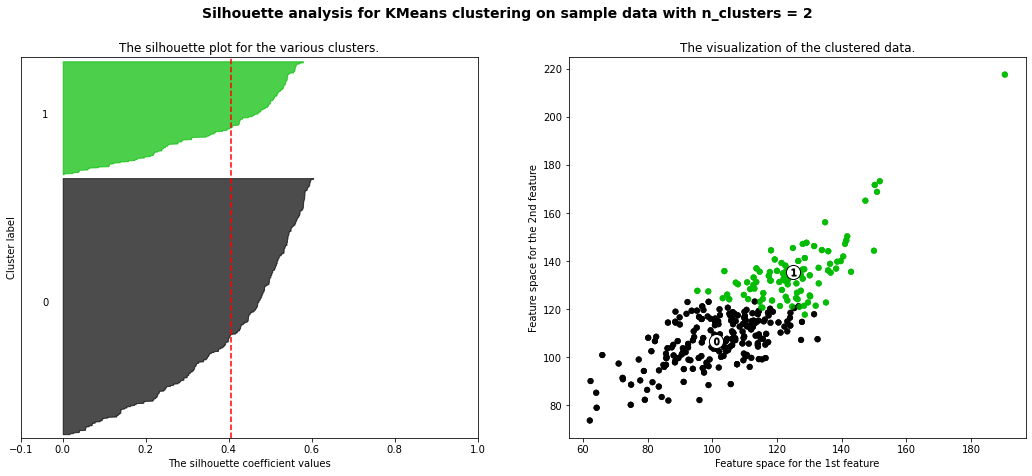

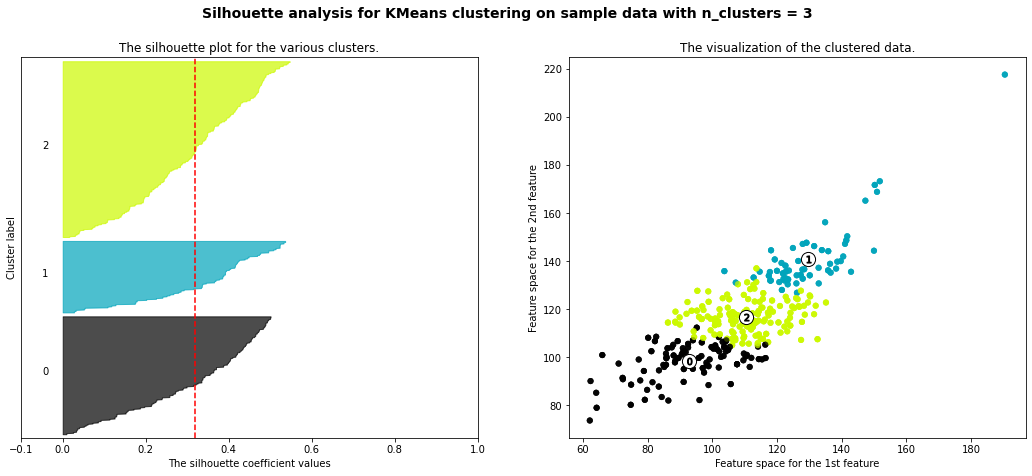

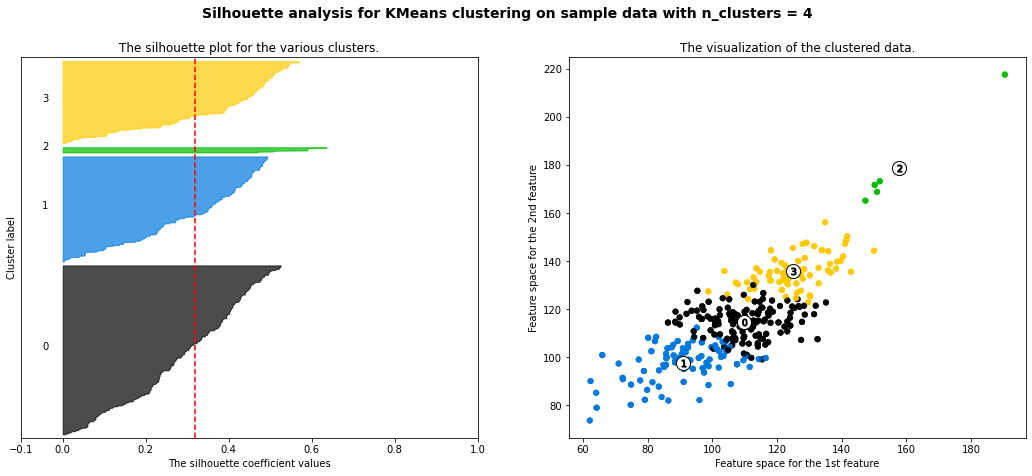

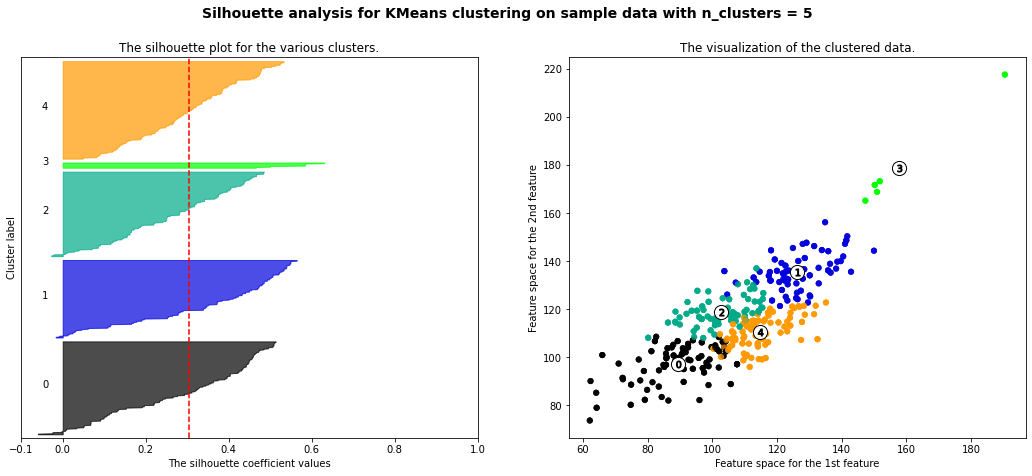

In [57]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.


range_n_clusters = [2, 3, 4, 5]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X['RCA5'], X['RCA10'], marker=".", s=150, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 4],
        centers[:, 9],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[4], c[9], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [58]:
km = KMeans(n_clusters= 2, random_state=10, max_iter = 600, tol = 1)

In [59]:
model = km.fit(X)

In [61]:
cluster_labels = model.labels_
cluster_labels.shape

(1025,)

In [62]:
X['labels'] = cluster_labels
X

,RCA1,RCA2,RCA3,RCA4,RCA5,RCA6,RCA7,RCA8,RCA9,RCA10,labels
0,3.623395,26.986391,-36.345638,-90.802895,109.295308,57.341762,14.822798,44.643980,33.044137,105.781111,0
1,6.605723,31.849862,-44.056089,-87.806613,100.902835,54.079539,17.992205,39.540839,27.039821,103.992585,0
2,12.387856,35.303190,-53.058181,-79.759402,72.252014,46.798786,27.026759,22.758752,32.241688,91.447900,0
3,9.234448,34.509489,-47.692351,-92.272309,99.748181,56.575958,19.170916,37.388049,31.119720,104.297148,0
4,9.604954,36.708700,-38.331962,-119.120718,98.730328,66.375980,34.303841,52.389306,54.204094,127.446400,1
...,...,...,...,...,...,...,...,...,...,...,...
1020,7.705246,32.043261,-42.418274,-96.937881,106.424164,59.656349,18.354762,43.967186,34.285942,110.160447,0
1021,5.070228,28.490303,-36.155063,-104.606097,105.909282,62.649900,26.504361,50.161756,46.092609,117.977897,0
1022,3.985402,26.466811,-26.175652,-108.369179,105.268349,63.847675,24.491160,57.311998,46.471895,118.139517,0
1023,1.310491,23.061772,-27.032775,-104.532071,116.218794,63.975946,18.004405,56.919988,42.780785,115.713516,0


In [63]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from sklearn.model_selection import train_test_split
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix
from keras import layers
from keras import models
from keras import utils
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Activation
from keras.regularizers import l2
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import SGD
from keras import datasets
from keras.utils import np_utils
from keras.callbacks import LearningRateScheduler
from keras.callbacks import History
from keras import backend as K
from keras import losses
from sklearn.utils import shuffle

In [64]:
y = X['labels']
X = X.drop(columns=['labels'])

print(X.shape)
print(y.shape)

(1025, 10)
(1025,)


In [65]:
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, stratify=y, random_state = 0)
print(x_train.shape)
print(x_test.shape)

(717, 10)
(308, 10)


In [66]:
from keras.constraints import maxnorm
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Dense(8, input_dim=x_train.shape[1], activation='relu', kernel_initializer='uniform', kernel_constraint=maxnorm(2)))
model.add(Dropout(0.1))
model.add(Dense(8, activation='relu', kernel_initializer='uniform', kernel_constraint=maxnorm(2)))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))
# Compile model
optimizer = Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [67]:
model_tuned = model.fit(x_train, y_train,
                    batch_size=10,
                    epochs=100,
                    verbose=1,
                    validation_split=0.2)

Epoch 1/100
58/58 [==============================] - 1s 4ms/step - loss: 0.6497 - accuracy: 0.6998 - val_loss: 0.6348 - val_accuracy: 0.6875
Epoch 2/100
58/58 [==============================] - 0s 2ms/step - loss: 0.6252 - accuracy: 0.6981 - val_loss: 0.6010 - val_accuracy: 0.6875
Epoch 3/100
58/58 [==============================] - 0s 2ms/step - loss: 0.5981 - accuracy: 0.6981 - val_loss: 0.5710 - val_accuracy: 0.6875
Epoch 4/100
58/58 [==============================] - 0s 2ms/step - loss: 0.5618 - accuracy: 0.7016 - val_loss: 0.5216 - val_accuracy: 0.6875
Epoch 5/100
58/58 [==============================] - 0s 2ms/step - loss: 0.5543 - accuracy: 0.6981 - val_loss: 0.5362 - val_accuracy: 0.6875
Epoch 6/100
58/58 [==============================] - 0s 2ms/step - loss: 0.5330 - accuracy: 0.7016 - val_loss: 0.4961 - val_accuracy: 0.6875
Epoch 7/100
58/58 [==============================] - 0s 2ms/step - loss: 0.5242 - accuracy: 0.6998 - val_loss: 0.4865 - val_accuracy: 0.6875
Epoch 8/100
5

In [68]:
score = model.evaluate(x_test, y_test, verbose=0)
score

[0.3151639997959137, 0.8701298832893372]

In [69]:
print('Test accuracy:', score[1])
print('Test loss:', score[0])

Test accuracy: 0.8701298832893372
Test loss: 0.3151639997959137


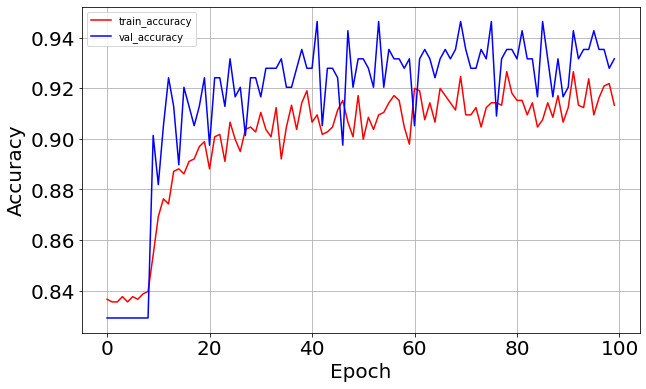

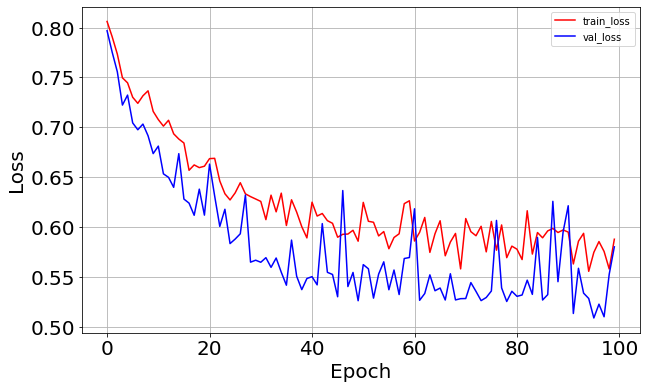

In [70]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(model_tuned.history['accuracy']), 'r', label='train_accuracy')
ax.plot(np.sqrt(model_tuned.history['val_accuracy']), 'b' ,label='val_accuracy')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Accuracy', fontsize=20)
ax.legend()
plt.grid()
ax.tick_params(labelsize=20)

fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(model_tuned.history['loss']), 'r', label='train_loss')
ax.plot(np.sqrt(model_tuned.history['val_loss']), 'b' ,label='val_loss')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
plt.grid()
ax.tick_params(labelsize=20)

In [77]:
X['labels'] = cluster_labels

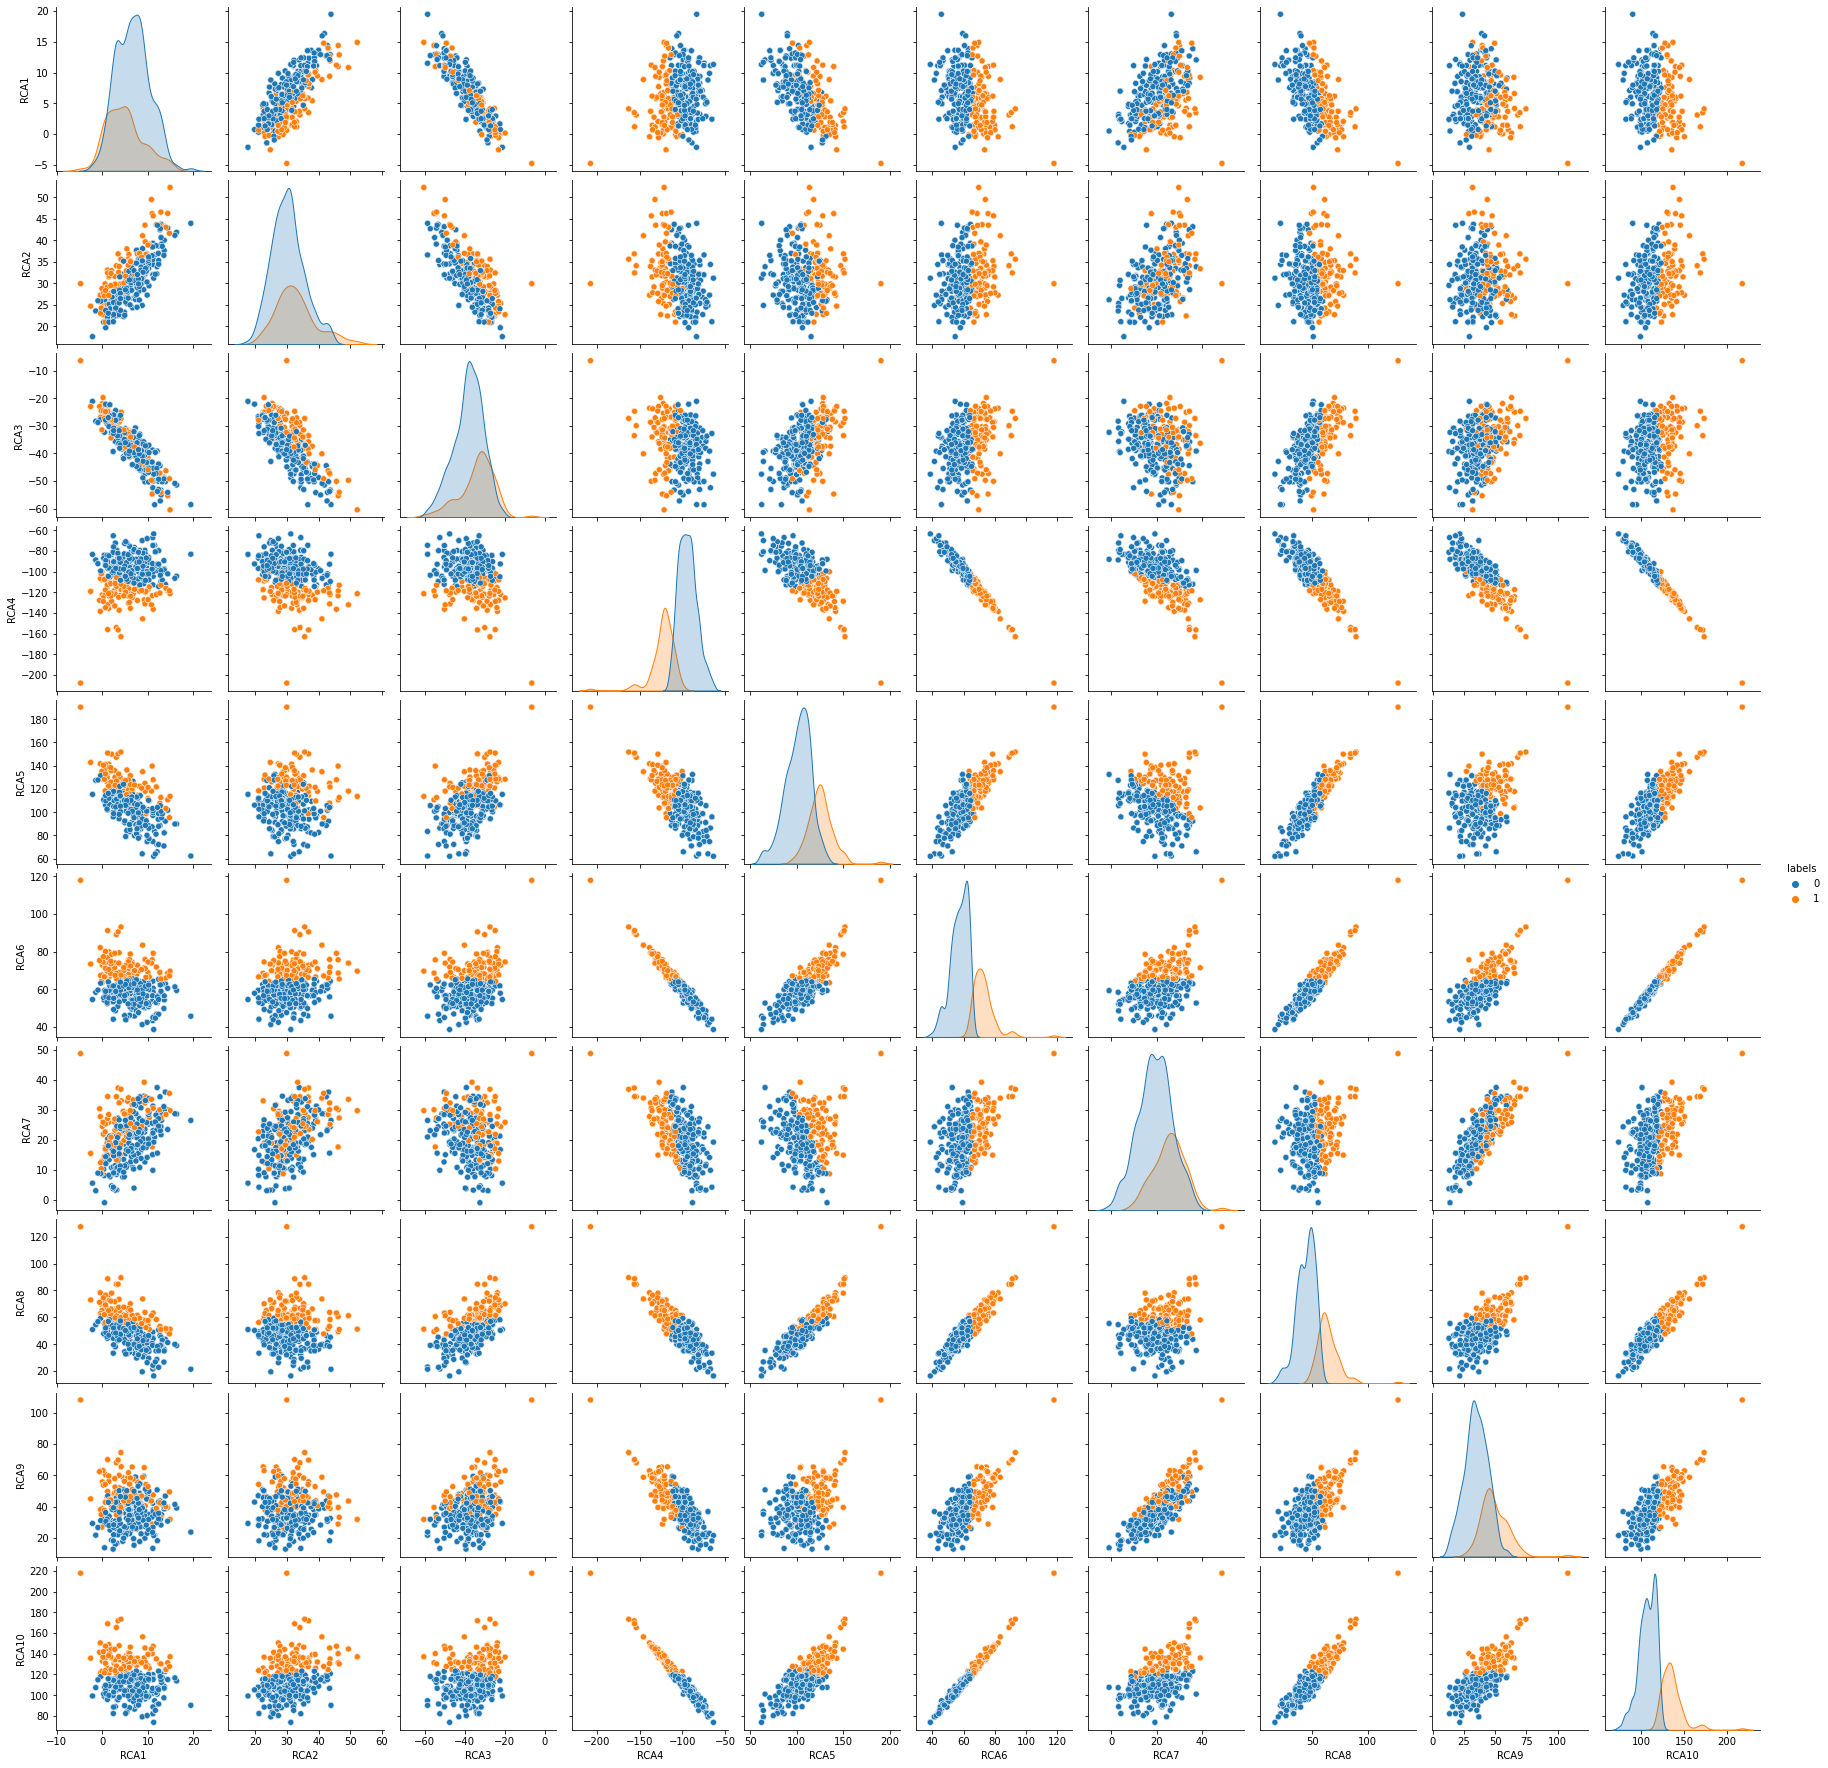

In [78]:
sns.pairplot(X, hue = 'labels')
plt.show()

For n_components = 2 The average silhouette_score is : 0.25518926221211974
For n_components = 3 The average silhouette_score is : 0.2400942311338744
For n_components = 4 The average silhouette_score is : 0.22462308021358507
For n_components = 5 The average silhouette_score is : 0.2089504173924796


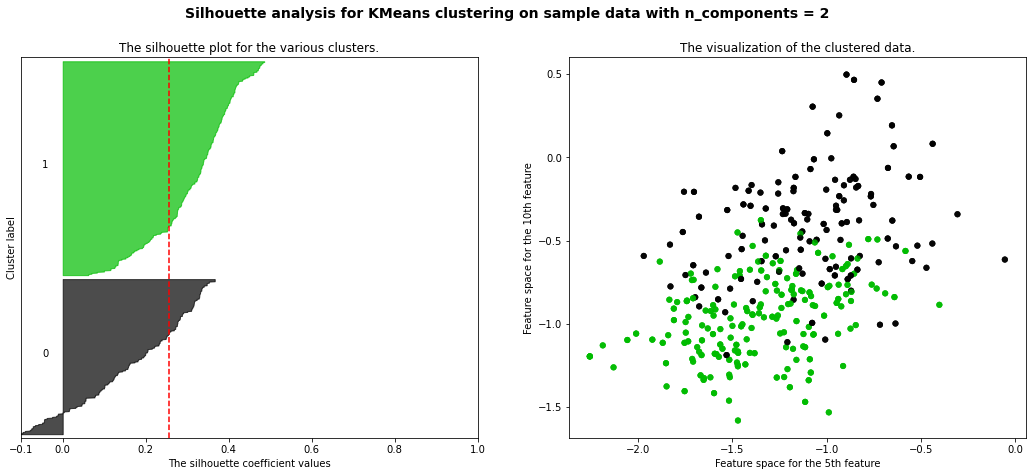

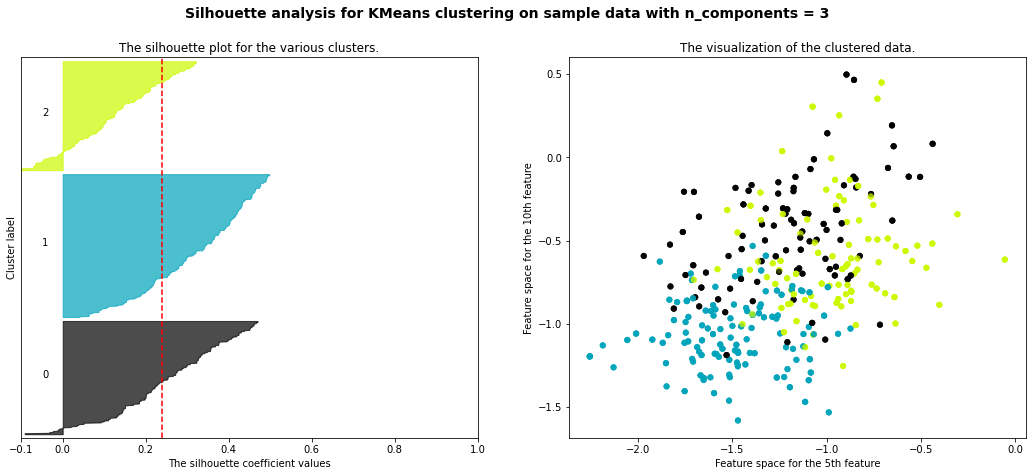

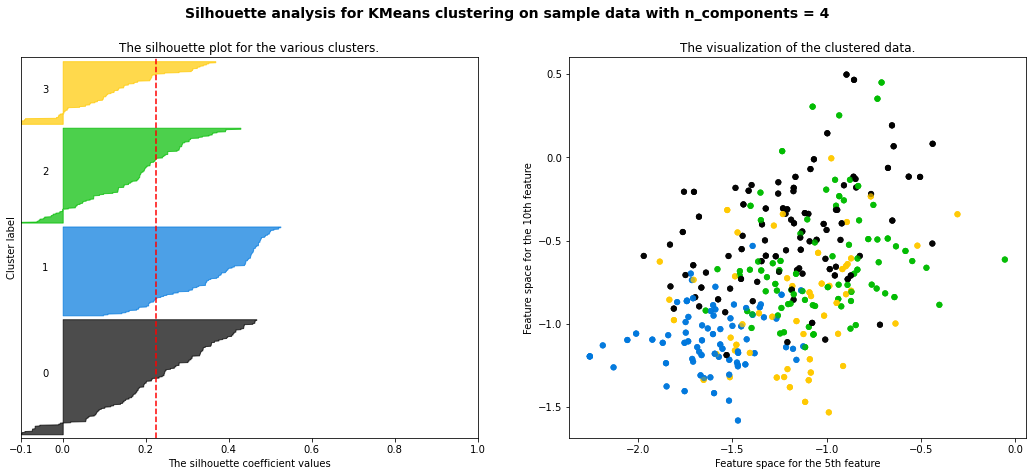

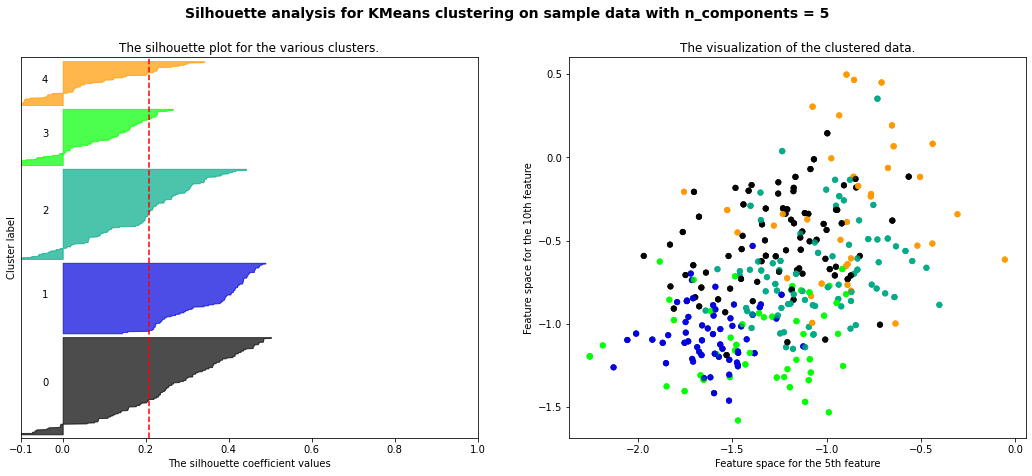

In [16]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn import mixture

range_n_components = [2, 3, 4, 5]

for n_components in range_n_components:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_components + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    gmm = mixture.GaussianMixture(
    n_components=n_components, covariance_type='diag', max_iter = 600, tol = 0.01, random_state = 4
        )
    cluster_labels = gmm.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_components =",
        n_components,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_components):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_components)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_components)
    ax2.scatter(
        X['RCA5'], X['RCA10'], marker=".", s=150, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )



    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 5th feature")
    ax2.set_ylabel("Feature space for the 10th feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_components = %d"
        % n_components,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [17]:
    gmm = mixture.GaussianMixture(
    n_components=2, covariance_type='diag', max_iter = 600, tol = 0.01, random_state = 4
        )
    cluster_labels = gmm.fit_predict(X)

In [18]:
labels = gmm.predict(X)
labels

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

In [19]:
X['labels'] = labels
X

,RCA1,RCA2,RCA3,RCA4,RCA5,RCA6,RCA7,RCA8,RCA9,RCA10,labels
0,0.712411,-1.187167,-0.189748,-0.072800,-2.010786,0.324473,0.334355,0.127410,-0.734547,-1.058416,1
1,0.236124,-0.495868,-0.698231,0.272746,-0.675750,0.525962,-0.038743,-0.818777,-1.117958,-0.063447,0
2,0.441481,-0.690733,-0.257584,-0.152245,-0.652783,0.266473,0.439022,-0.898745,-1.182911,-0.379602,0
3,0.736023,-0.964978,0.050350,-0.092591,-1.869745,0.376301,0.539024,0.120112,-0.744211,-1.113845,1
4,0.430171,-0.177705,0.233712,-0.402465,-0.934314,-0.373212,-0.378670,-0.526784,-0.164599,0.252195,0
...,...,...,...,...,...,...,...,...,...,...,...
1020,0.101493,-1.090398,-0.273666,-0.201572,-1.512495,0.379951,0.529519,-0.314561,-1.171423,-0.788363,0
1021,0.097703,-1.201907,-0.558905,-0.146379,-1.216257,0.644224,0.379344,-0.663567,-1.409282,-0.558012,0
1022,-0.138039,-0.994898,-0.540083,-0.171292,-1.116683,0.478733,0.277201,-0.496370,-1.228117,-0.334408,0
1023,0.195363,-1.043532,0.150551,-0.264470,-1.264513,0.534935,0.589397,0.170686,-0.524435,-0.800017,1


In [20]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from sklearn.model_selection import train_test_split
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix
from keras import layers
from keras import models
from keras import utils
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Activation
from keras.regularizers import l2
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import SGD
from keras import datasets
from keras.utils import np_utils
from keras.callbacks import LearningRateScheduler
from keras.callbacks import History
from keras import backend as K
from keras import losses
from sklearn.utils import shuffle

In [21]:
y = X['labels']
X = X.drop(columns=['labels'])

print(X.shape)
print(y.shape)

(1025, 10)
(1025,)


In [22]:
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, stratify=y, random_state = 0)
print(x_train.shape)
print(x_test.shape)

(717, 10)
(308, 10)


In [23]:
from keras.constraints import maxnorm
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Dense(8, input_dim=x_train.shape[1], activation='relu', kernel_initializer='uniform', kernel_constraint=maxnorm(2)))
model.add(Dropout(0.1))
model.add(Dense(8, activation='relu', kernel_initializer='uniform', kernel_constraint=maxnorm(2)))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))
# Compile model
optimizer = Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
model_tuned = model.fit(x_train, y_train,
                    batch_size=10,
                    epochs=100,
                    verbose=1,
                    validation_split=0.2)

Epoch 1/100
58/58 [==============================] - 1s 4ms/step - loss: 0.6883 - accuracy: 0.5986 - val_loss: 0.6784 - val_accuracy: 0.5486
Epoch 2/100
58/58 [==============================] - 0s 2ms/step - loss: 0.6414 - accuracy: 0.6178 - val_loss: 0.6025 - val_accuracy: 0.6111
Epoch 3/100
58/58 [==============================] - 0s 2ms/step - loss: 0.5445 - accuracy: 0.7068 - val_loss: 0.4847 - val_accuracy: 0.8194
Epoch 4/100
58/58 [==============================] - 0s 2ms/step - loss: 0.4504 - accuracy: 0.8133 - val_loss: 0.3854 - val_accuracy: 0.9444
Epoch 5/100
58/58 [==============================] - 0s 2ms/step - loss: 0.3616 - accuracy: 0.8988 - val_loss: 0.3000 - val_accuracy: 0.9514
Epoch 6/100
58/58 [==============================] - 0s 2ms/step - loss: 0.2899 - accuracy: 0.9267 - val_loss: 0.2319 - val_accuracy: 0.9722
Epoch 7/100
58/58 [==============================] - 0s 2ms/step - loss: 0.2337 - accuracy: 0.9442 - val_loss: 0.1828 - val_accuracy: 0.9861
Epoch 8/100
5

In [25]:
score = model.evaluate(x_test, y_test, verbose=0)
score

[0.04338208585977554, 0.9837662577629089]

In [26]:
print('Test accuracy:', score[1])
print('Test loss:', score[0])

Test accuracy: 0.9837662577629089
Test loss: 0.04338208585977554


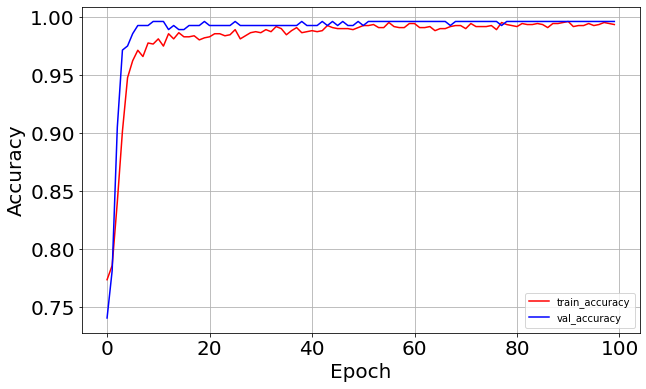

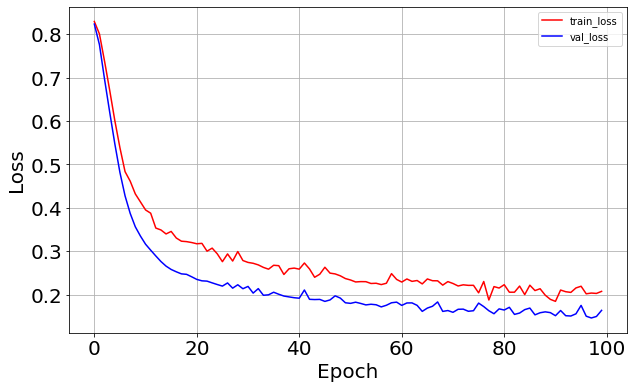

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(model_tuned.history['accuracy']), 'r', label='train_accuracy')
ax.plot(np.sqrt(model_tuned.history['val_accuracy']), 'b' ,label='val_accuracy')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Accuracy', fontsize=20)
ax.legend()
plt.grid()
ax.tick_params(labelsize=20)

fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(model_tuned.history['loss']), 'r', label='train_loss')
ax.plot(np.sqrt(model_tuned.history['val_loss']), 'b' ,label='val_loss')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
plt.grid()
ax.tick_params(labelsize=20)